## Natural Language Processing

In this chapter we don't follow the book, but the section "Encoding Categorical Features Using Embeddings" in Chapter 13 can be an interesting read.
### Introduction
In this section we look at a particular type of machine learning, where the _objects are text documents_ such as  
  
- articles in newspapers
- scientific papers
- e-mails
- reviews on websites
- text messages
    
The main difference between text documents and the othe datasets we have use so far is that text documents consists of words. So the main problem is to convert plain text to a format that can be used by the standard machine learning methods. This is called _text feature engineering_. 
  
This subdiscipline of data mining is called **text mining**.   
  
### NLP Tasks
Natural Language Processing (NLP) is a part of computer science and artificial intelligence which deals with _human languages_.
In other words, NLP is a component of text mining that performs a special kind of linguistic analysis that essentially helps a machine “read” text. It uses a different methodology to _decipher the ambiguities in human language_.  Some typcial NLP Tasks are listed below. 

**Text classification**
- Is this text message SPAM or not? 
- To which of a set of predefined e-mail categories does this e-mail belong? 
- Is this paper about medicine?  Yes/No.

**Text Generation**
- the process of creating coherent and contextualy appropriate text based on a give input or prompt: chatbots, creative writing, content creation, code generation, ...

**Question Answering**
- extracting or generating answers to natural language questions

**Text Translation**
- convert text and speech from one language to another

**Sentence Similarity**
- measure how semantically close two pieces of text are. 
- used in e.g. plagiarism detection, duplicate questions identification and recommendation systemes

**Text summarization**
- consens lenghty documents into shorter, coherent versions while retaining the most critical information

### Feature Engineering in NLP: Representing text documents for data mining

#### Word Embeddings

_Word embeddings_ are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.

For instance, "coconut" and "polar bear" are words that are semantically quite different, so a reasonable embedding space would represent them as vectors that would be very far apart. But "kitchen" and "dinner" are related words, so they should be embedded close to each other.

Ideally, in a good embeddings space, the "path" (a vector) to go from "kitchen" to "dinner" would capture precisely the semantic relationship between these two concepts. In this case the relationship is "where x occurs", so you would expect the vector kitchen - dinner (difference of the two embedding vectors, i.e. path to go from dinner to kitchen) to capture this "where x occurs" relationship. Basically, we should have the vectorial identity: dinner + (where x occurs) = kitchen (at least approximately). If that's indeed the case, then we can use such a relationship vector to answer questions. For instance, starting from a new vector, e.g. "work", and applying this relationship vector, we should get sometime meaningful, e.g. work + (where x occurs) = office, answering "where does work occur?".

Word embeddings are computed by applying dimensionality reduction techniques to datasets of co-occurence statistics between words in a corpus of text. This can be done via neural networks (the "word2vec" technique), or via matrix factorization.


Popular Word Embedding models are Google’s Word2Vec (2013), Stanford’s GloVe (2014) and Facebook’s FastText (2016).

##### Glove

**GloVe** is a word vector technique and stands for "Global Vectors for Word Representation". It's a somewhat embedding technique based on factorizing a matrix of word co-occurence statistics.

Specifically, we will use the 100-dimensional GloVe embeddings of 400k words computed on a 2014 dump of English Wikipedia.

Word vectors put words to a nice vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But there’s quite a bit of synergy between the GloVe and Word2vec.

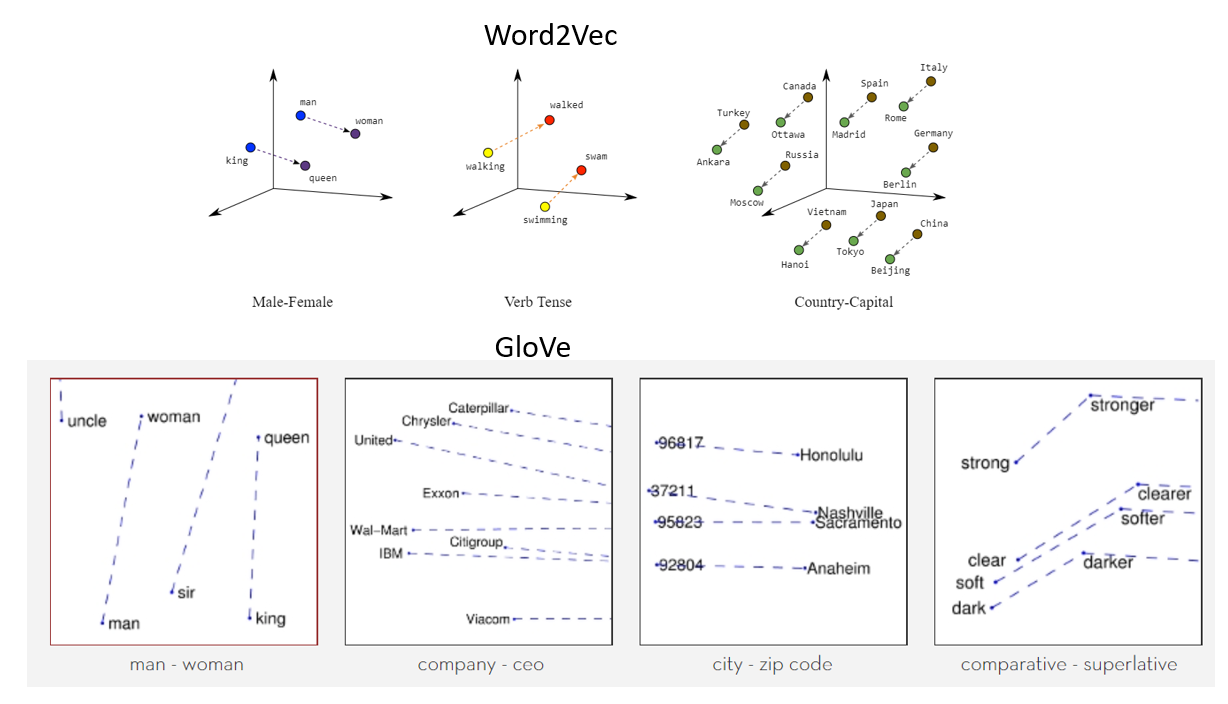



##### Experiment

We did an experiment with Word2Vec trained with the dutch wikipedia vocabulary and ask for the ten words that are closest to "paprika": 

1.	courgette
2.	uien
3.	tomaten
4.	komkommer
5.	knoflook
6.	chilipepers
7.	aubergine
8.	tomaat
9.	groenten
10.	gekookte


It's amazing to see that all words are (related to) vegetables, although nobody told the system about vegetables.  It's purely because those words often appear in each others neighbourhood in wikipedia articles. 

##### Transformers and Sentence Embedding

- Pretrained word embeddings were popular for several years, but this approach has its limits. In particular, a word has a single representation, no matter the context.
- For example, the word “right” is encoded the same way in “left and right” and “right and wrong”, even though it means two very different things. 
- In practice we have to deal with complete documents, consisting of sentences and paragraphs. 
- In a groundbreaking 2017 paper, a team of Google researchers suggested an architecture called the __transformer__, which was a new neural network architecture for natural language translation, that outformed existing machine translation systems. 
- Since 2018 progress has been astounding, with larger and larger transformer-based architectures trained on immense datasets.
- In 2018 OpenAI published their GPT paper “Improving Language Understanding by Generative Pre-Training”. 
- In 2019 Google’s BERT (Bidirectional Encoder Representations from Transformers) paper came out: it also demonstrated the effectiveness of self-supervised pretraining on a large corpus, using a similar architecture to GPT. 
- One of the applications of BERT and other transformers is _Sentence Embedding_, which can be used for turning complete documents into a sequence of numbers.   
- The Sentence Embedding model is pretrained on a variety of data, including Wikipedia, web news, web question-answer pages and discussion forums, and it performs well on sentence semantic similarity tasks:

![](img/sentence_embedding.png)

- Semantic similarity is a measure of the degree to which two pieces of text carry the same meaning.  
- In general, sentence embeddings have high dimensionality (>500 features each), therefore dimensionality reduction can be useful. 



In [2]:
from sentence_transformers import SentenceTransformer
import seaborn as sns

c:\REPOS\Workshop_AI_MachineLearning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
MODEL = 'sentence-transformers/distiluse-base-multilingual-cased-v1'
model = SentenceTransformer(MODEL)

# Define the sentences
sentences = [
    'The cat lounged lazily on the warm windowsill.',
    'A feline relaxed comfortably on the sun-soaked ledge.',
    'The kitty reclined peacefully on the heated window perch.',
    'Quantum mechanics challenges our understanding of reality.',
    'The chef expertly julienned the carrots for the salad.',
    'The vibrant flowers bloomed in the garden.',
    'Las flores vibrantes florecieron en el jardín. ',
    'Die lebhaften Blumen blühten im Garten.'
]

In [4]:
# Get the embeddings
sentence_embeddings = model.encode(sentences)
print(sentence_embeddings.shape)

(8, 512)


<Axes: >

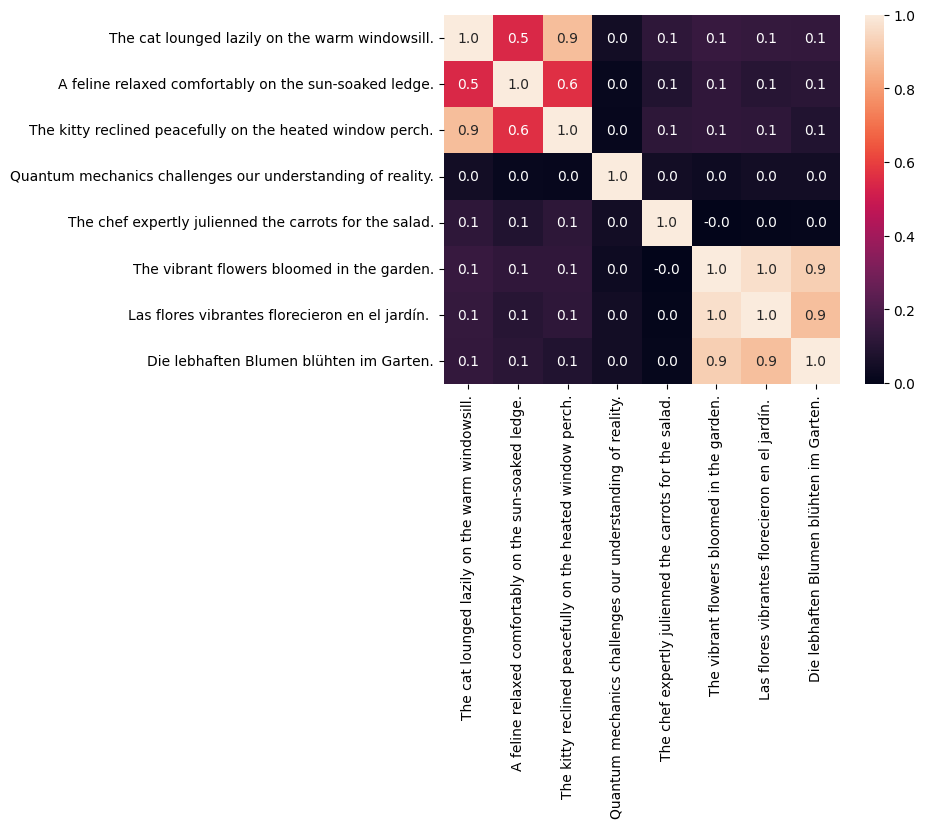

In [5]:
# Calculate linear correlation matrix for embeddings
sentence_embeddings_corr = np.corrcoef(sentence_embeddings)
import seaborn as sns
# show annotation with one digit
sns.heatmap(sentence_embeddings_corr, annot=True,
            fmt=".1f",
            xticklabels=sentences, 
            yticklabels=sentences)

### Text Summarization

We scrape a text from a website and generate a summarization. 

In [1]:
from transformers import pipeline
import requests
from bs4 import BeautifulSoup # BeautifulSoup is the number one tool for web scrapîng in Python
import re

c:\REPOS\Workshop_AI_MachineLearning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
task = "summarization"
model = "sshleifer/distilbart-cnn-12-6"
summarizer = pipeline(task=task, model=model)


Device set to use cpu


In [ ]:
url = "https://www.ie-net.be/civicrm/event/info?id=3861&reset=1"

print(f"Scraping content from: {url}")
response = requests.get(url, timeout=10)
soup = BeautifulSoup(response.content, 'html.parser')

# Remove script and style elements
for script in soup(["script", "style"]):
    script.decompose()

# Get text content
text = soup.get_text()

# Clean up the text
lines = (line.strip() for line in text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = ' '.join(chunk for chunk in chunks if chunk)
text = re.sub(r"\n\s*\n+", "\n", text)
print(text)

Scraping content from: https://www.ie-net.be/civicrm/event/info?id=3861&reset=1
WORKSHOP AI & MACHINE LEARNING (gedeeltelijk online) | ie-net Overslaan en naar de inhoud gaan Selecteer een afdelingAgrarische productie & ecosfeerAkoestiek & trillingenBiomedische techniek en gezondheidszorgBouwfysica, gebouwentechniek en architectuurChemische en Biochemische TechnologieCiviele techniekCrittoDenktank HavenEmerging Digital TechnologiesEnergie - elektrotechniekGeotechniekHygienic engineering & design for food and pharmaIndustriële Visie en RoboticaIntellectuele eigendomLeiderschap management excellentieLucht & ruimtevaartMeet- en regeltechniekMobiliteit & transportPiping Pijpleidingen en LastechniekenProcess Analyser TechnologySustainable Development GoalsVeiligheid en beveiligingVoedingWegenbouwie-net - Da Vinci seniorenie-net Antwerpenie-net Brabant - Brusselie-net Ingenieur-deskundigen & bemiddelaarsie-net Jongerenie-net Kempenie-net Limburgie-net Mechelenie-net Motardsie-net Oost-Vlaand

In [5]:
position = text.find("Welke klanten dreig ik te verliezen?") # take most relevant part of text
article_text = text[position:]
# Take first 2500 characters. We cannot pass the complete article due to limits to the model's context window. 
article_text = article_text[:2500]
print(f"Successfully scraped {len(article_text)} characters from the web page.")
print(article_text)

Successfully scraped 2500 characters from the web page.
Welke klanten dreig ik te verliezen?”, “Welke producten kopen mijn klanten meestal samen?”, “Welke emotie verraadt een gezicht op een foto?”, “Wat is het sentiment van een tekst?”, "Welke parameters bepalen de huizenprijs?", "Hoe werkt een spamfilter?" Vind je deze vragen intrigerend en wil je meer weten over de wondere wereld van AI en machine learning om ze op te lossen? Dan is deze vijfdaagse hands-on workshop beslist iets voor jou. DOELGROEP Deze workshop richt zich op al wie professioneel met data science aan de slag wil gaan. Enige voorkennis van programmeren (in om het even welke programmeertaal) is gewenst. PLANNING M.b.v. van de Python-bibliotheken illustreren we, na een korte, theoretische introductie voor elk probleem een oplossing in Python. De focus ligt hierbij meer op de praktische uitwerking dan op de wiskundige achtergrond. Daarna krijg je zelf de kans om met een reële (maar hanteerbare) dataset onmiddellijk met h

In [7]:
#%% Summarization
print("\nGenerating summary...")
result = summarizer(article_text, min_length=100, max_length=400, do_sample=False)

# Display results
print("\n" + "="*50)
print("SUMMARY:")
print("="*50)
print(result[0]['summary_text'])
print("="*50)

# Statistics
word_count = len(result[0]['summary_text'].split(' '))
char_count = len(result[0]['summary_text'])
print(f"\nSummary statistics:")
print(f"- Words: {word_count}")
print(f"- Characters: {char_count}")
print(f"- Original text length: {len(article_text)} characters")


Generating summary...

SUMMARY:
 The workshop richt zich op al wie professioneel met data science aan de slag wil gaan . The focus ligt hierbij meer op de praktische uitwerking dan op de wiskundige achtergrond . De live sessies te Antwerpen gaan door op : 12 & 16 & 23 & 26 september 2025 . The workshop will take place in Antwerp, vanaf 12 & 17 & 26 September 2025 .

Summary statistics:
- Words: 68
- Characters: 335
- Original text length: 2500 characters
